In [1]:
# Histogramas para diagramas de constelación

In [1]:
import sofa
import polars as pl
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os

from scipy.io import loadmat

2023-07-04 11:07:10.465163: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-04 11:07:10.466717: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-04 11:07:10.499085: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-04 11:07:10.499588: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-04 11:07:11.039966: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
# Función especial para leer todos los datos con la estructura estudiada
def read_data(folder_rx):
    data = {}

    # Leer la carpeta principal
    for folder in os.listdir(folder_rx):
        # Leer las subcarpetas
        if folder.endswith("spacing"):
            data[folder] = {}
            for file in os.listdir(f"{folder_rx}/{folder}"):
                if file.find("consY") != -1:
                    data_name = file.split("_")[2]
                    if data[folder].get(data_name) == None:
                        data[folder][data_name] = {}
                    mat_file_data = loadmat(f"{folder_rx}/{folder}/{file}")
                    data[folder][data_name] = mat_file_data
    return data


In [4]:
file_tx = "Demodulation/Data/2x16QAM_16GBd.mat"
folder_rx = "Demodulation/Data/"

# Datos transmitidos
X_tx_norm = loadmat(file_tx)
X_tx_norm = X_tx_norm.get("Constellation").flatten()[0][0].flatten()
X_tx = sofa.mod_norm(X_tx_norm, 10)*X_tx_norm

# Leer los datos recibidos
data = read_data(folder_rx)

In [16]:
spacing = "18"
X_rx = data[f"{spacing}GHz_spacing"]

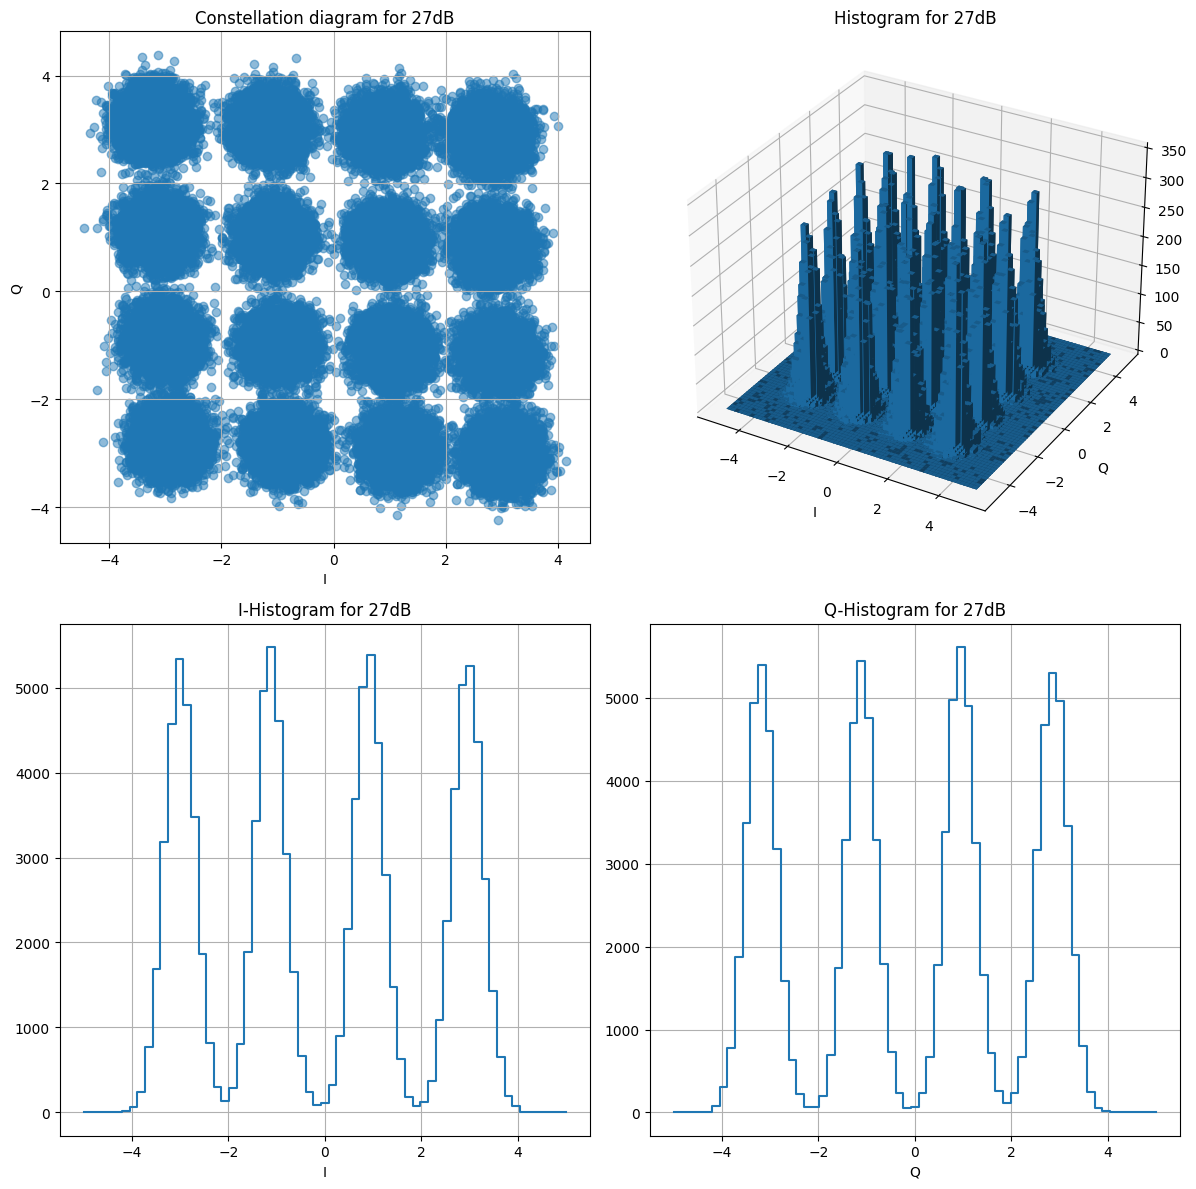

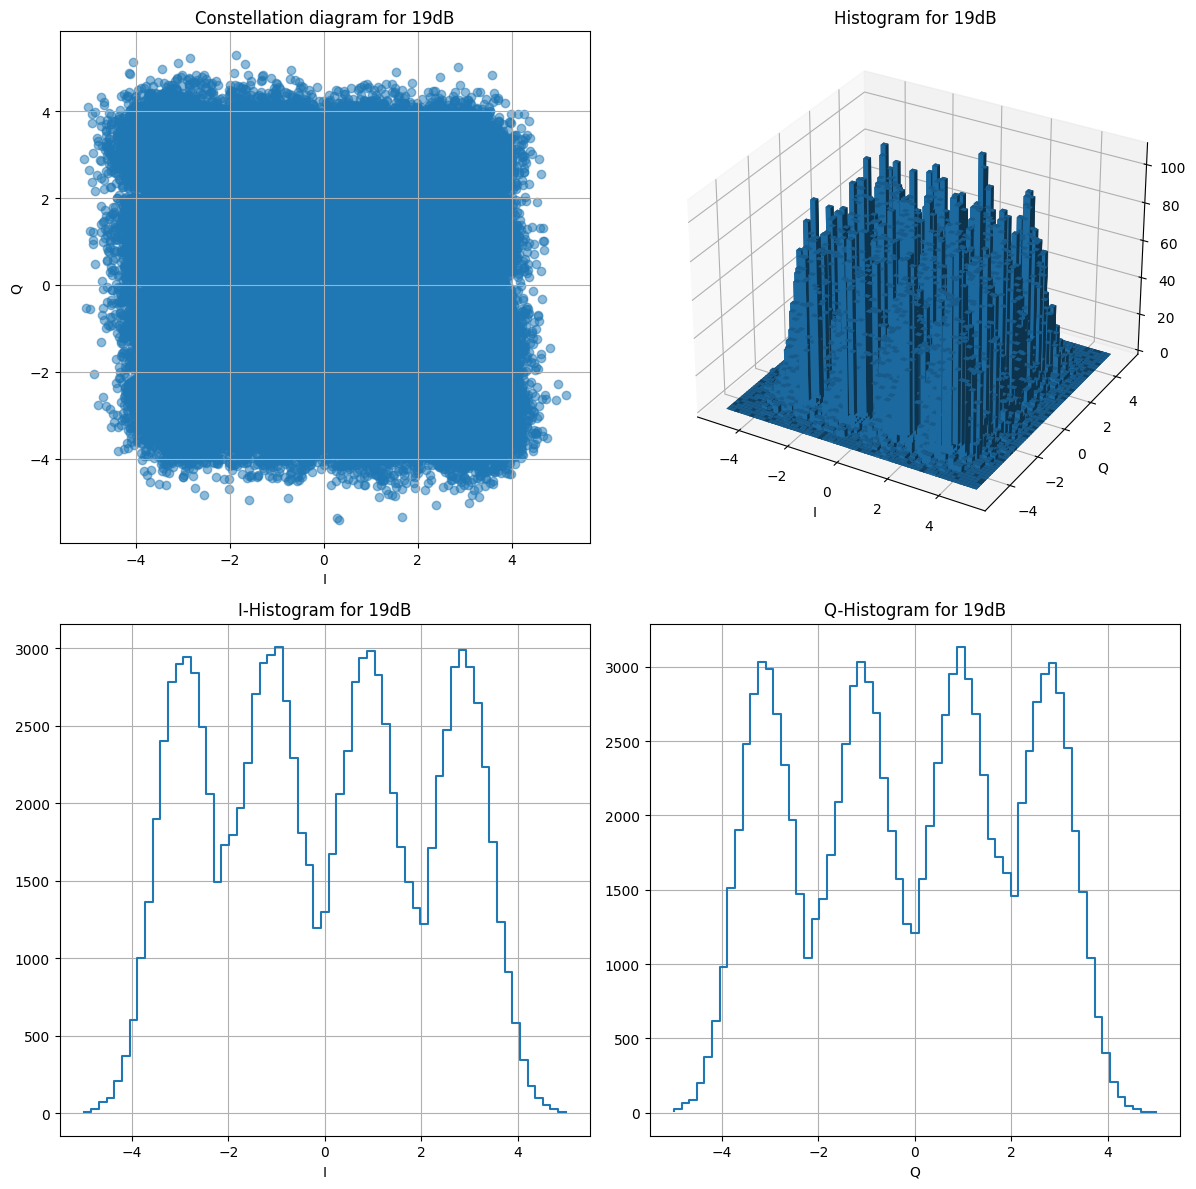

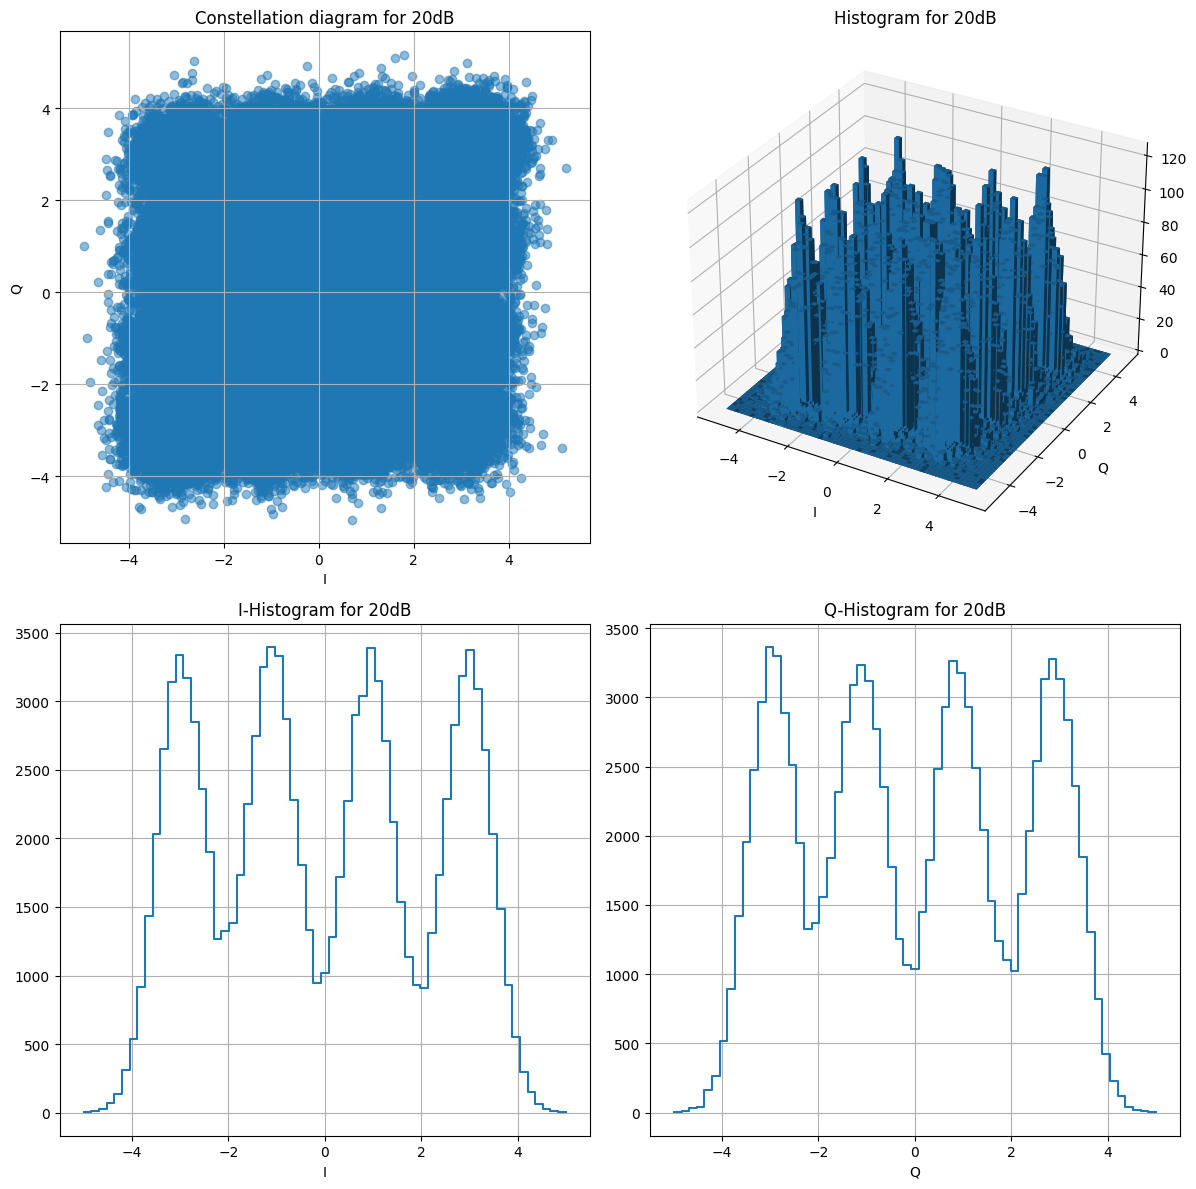

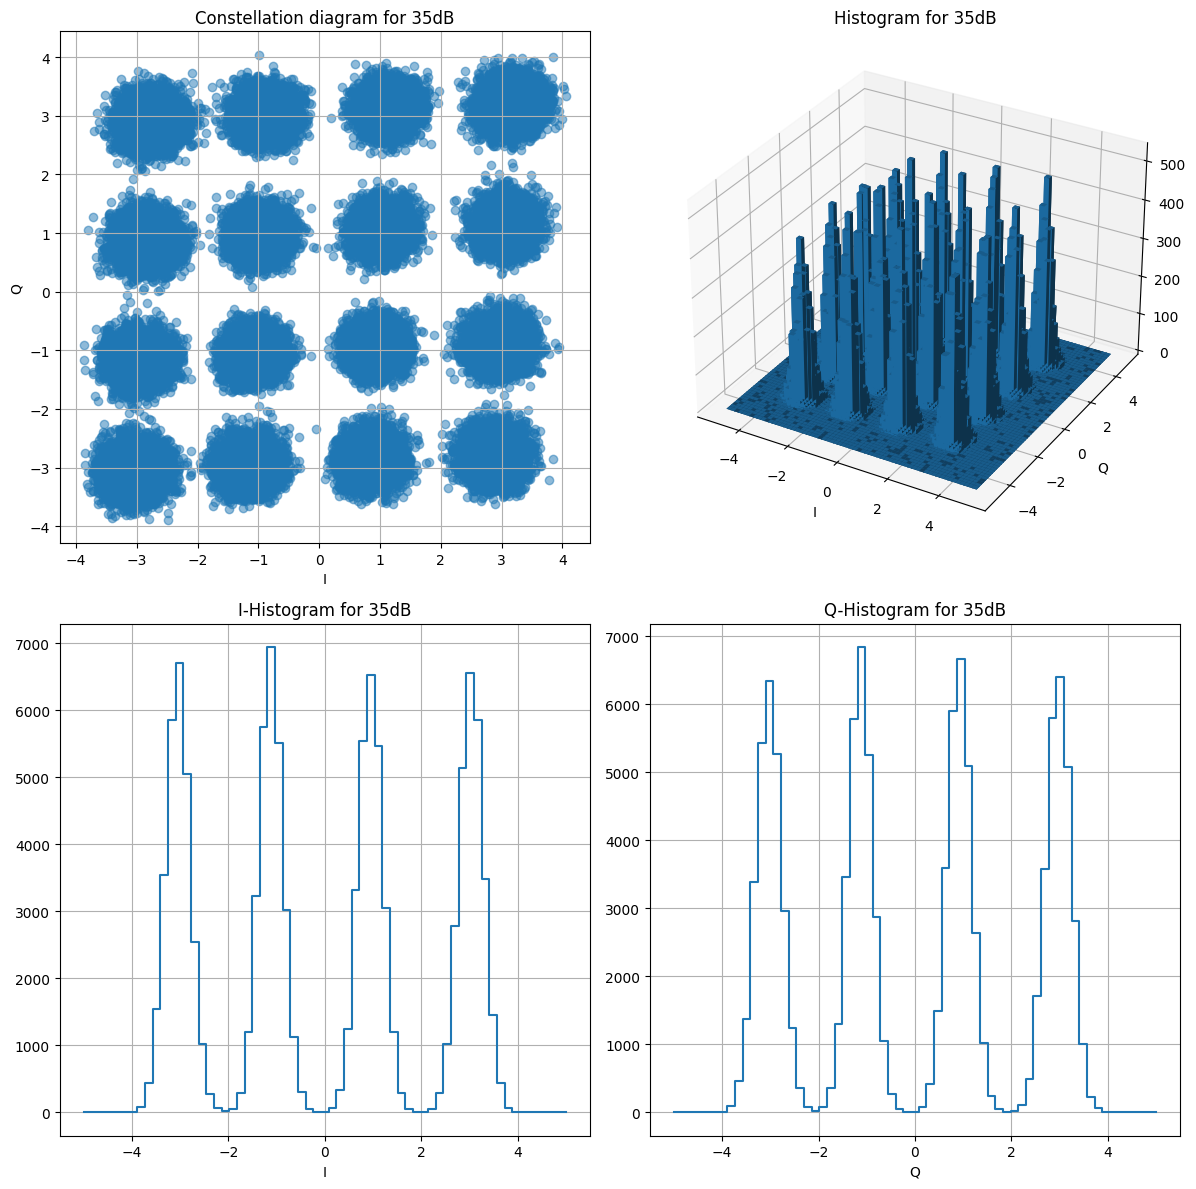

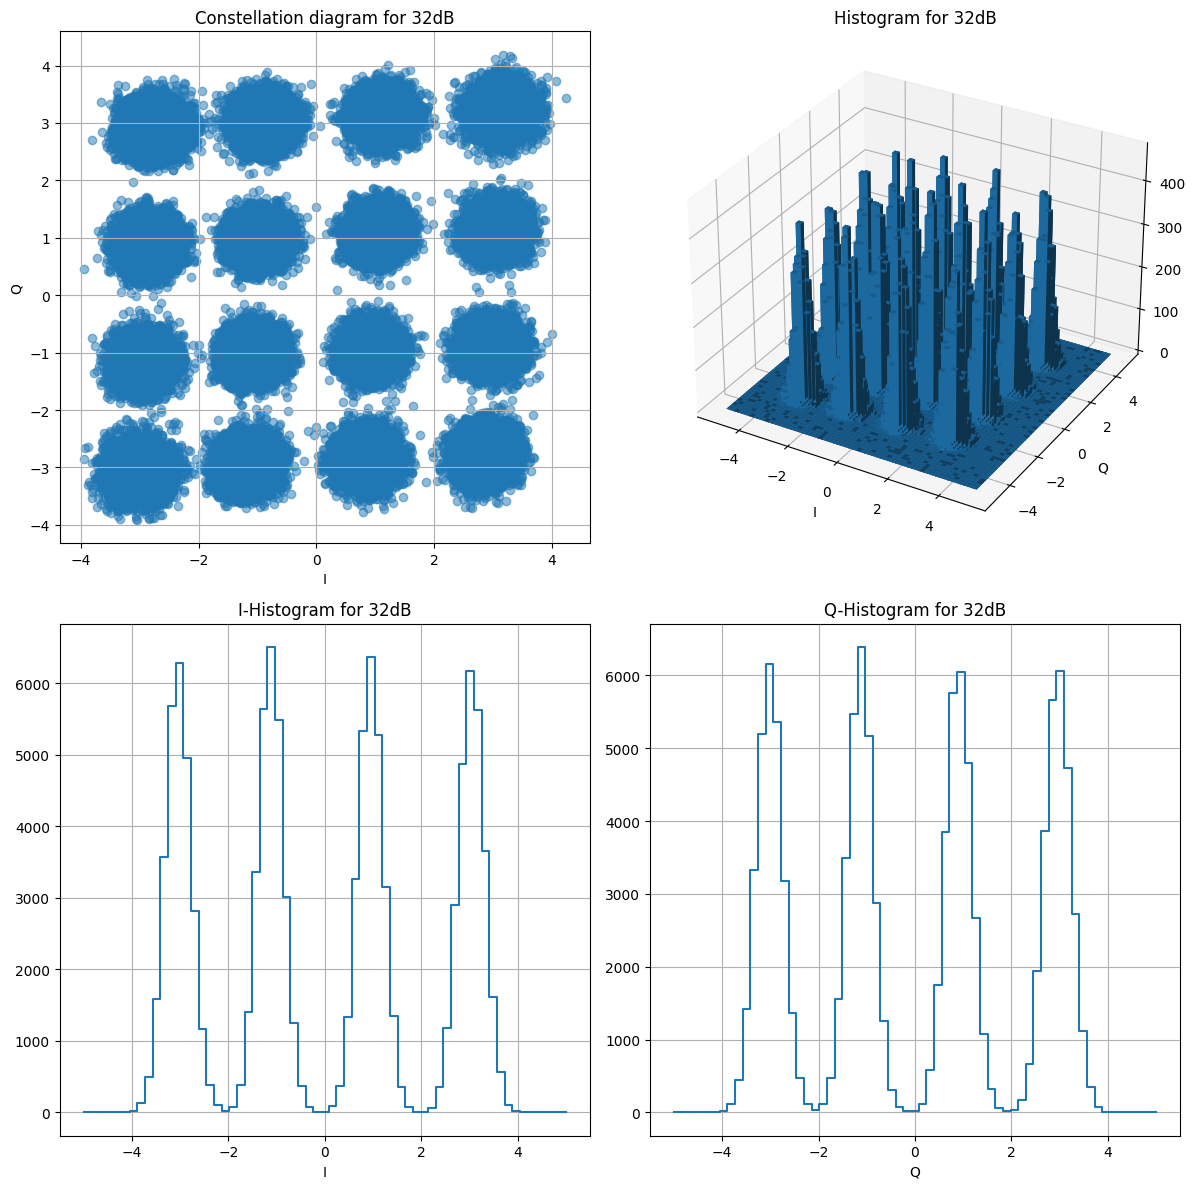

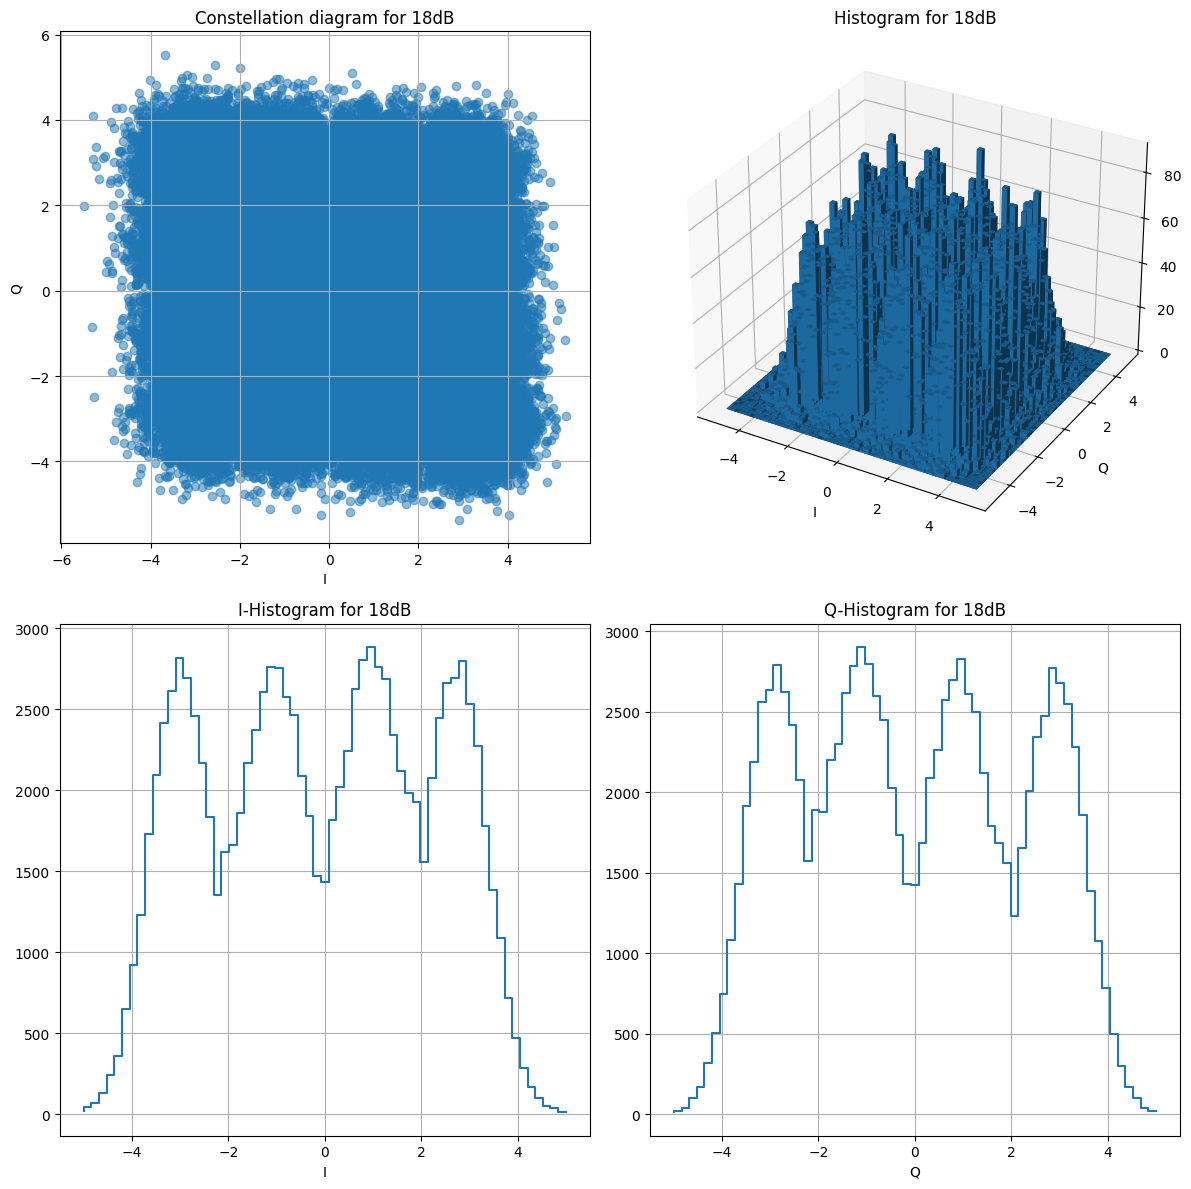

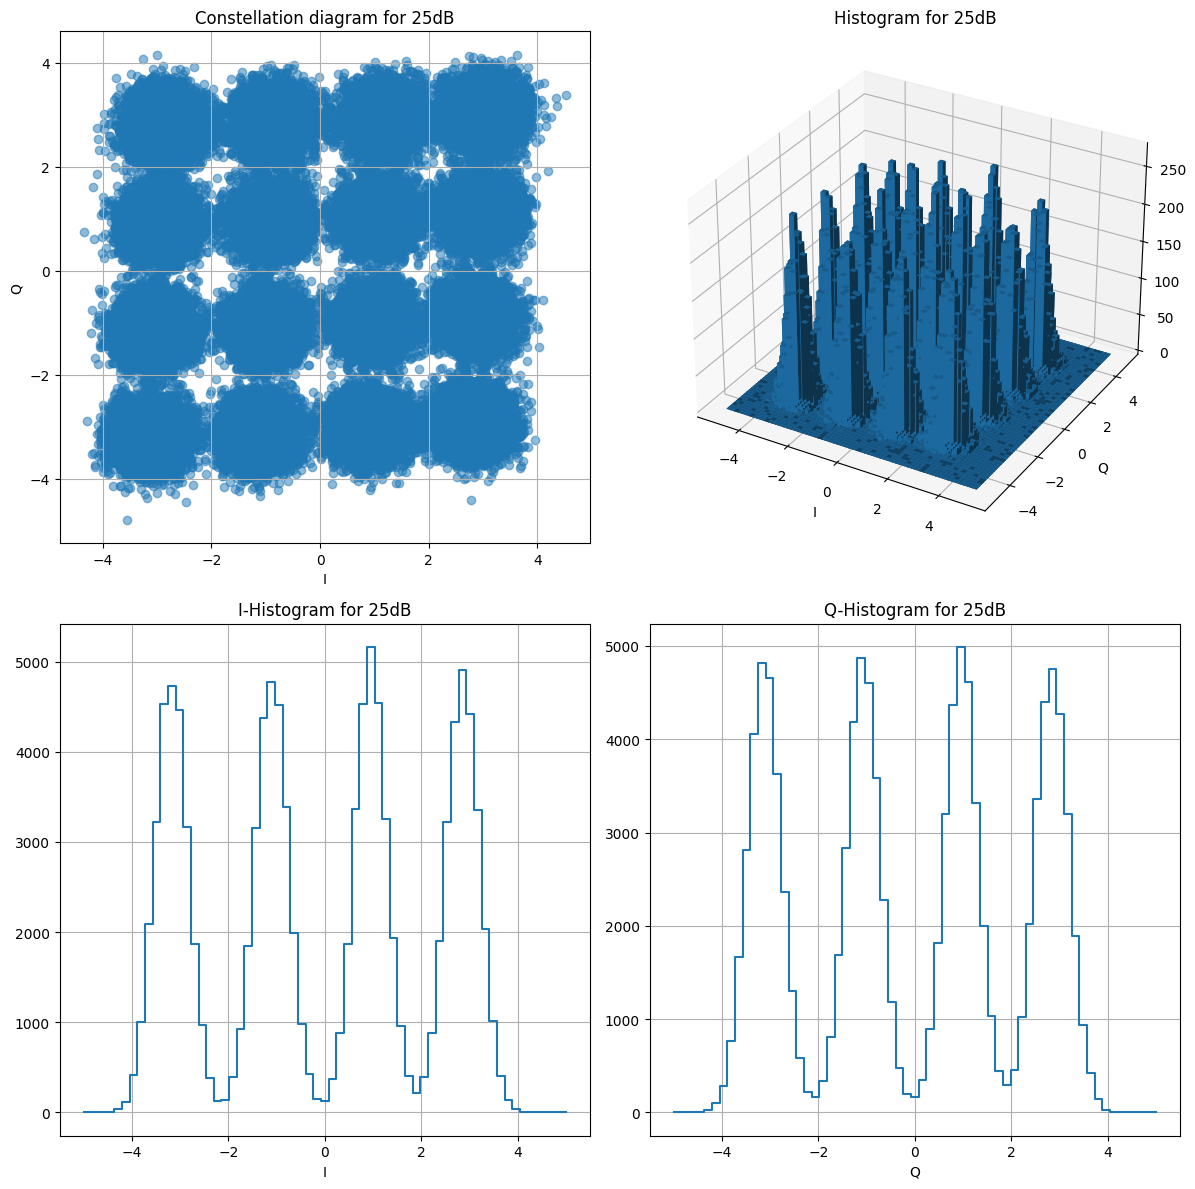

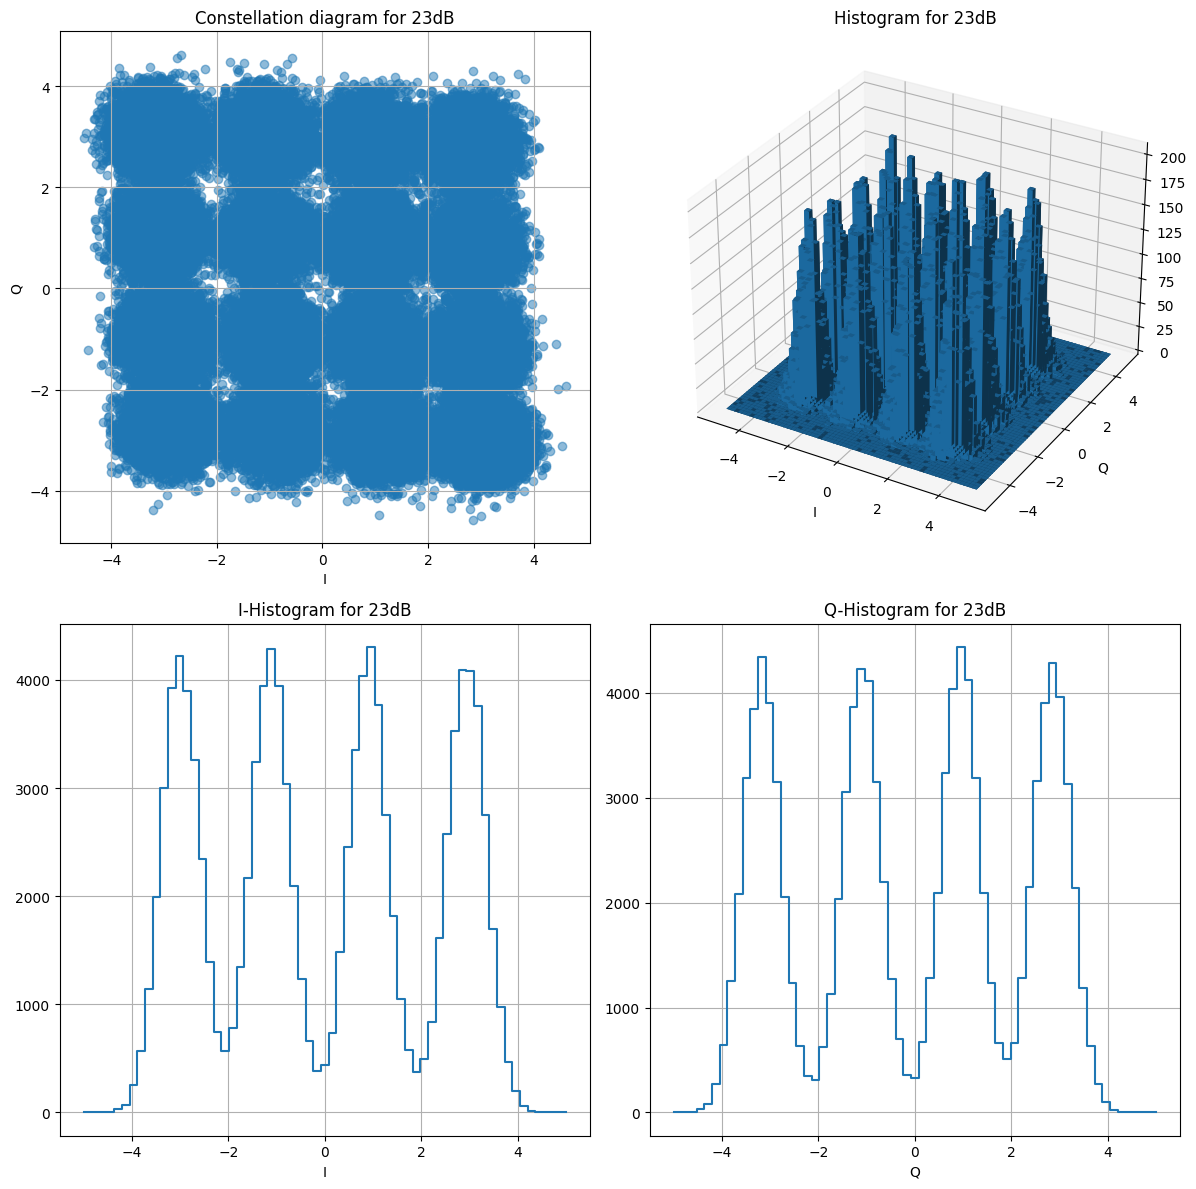

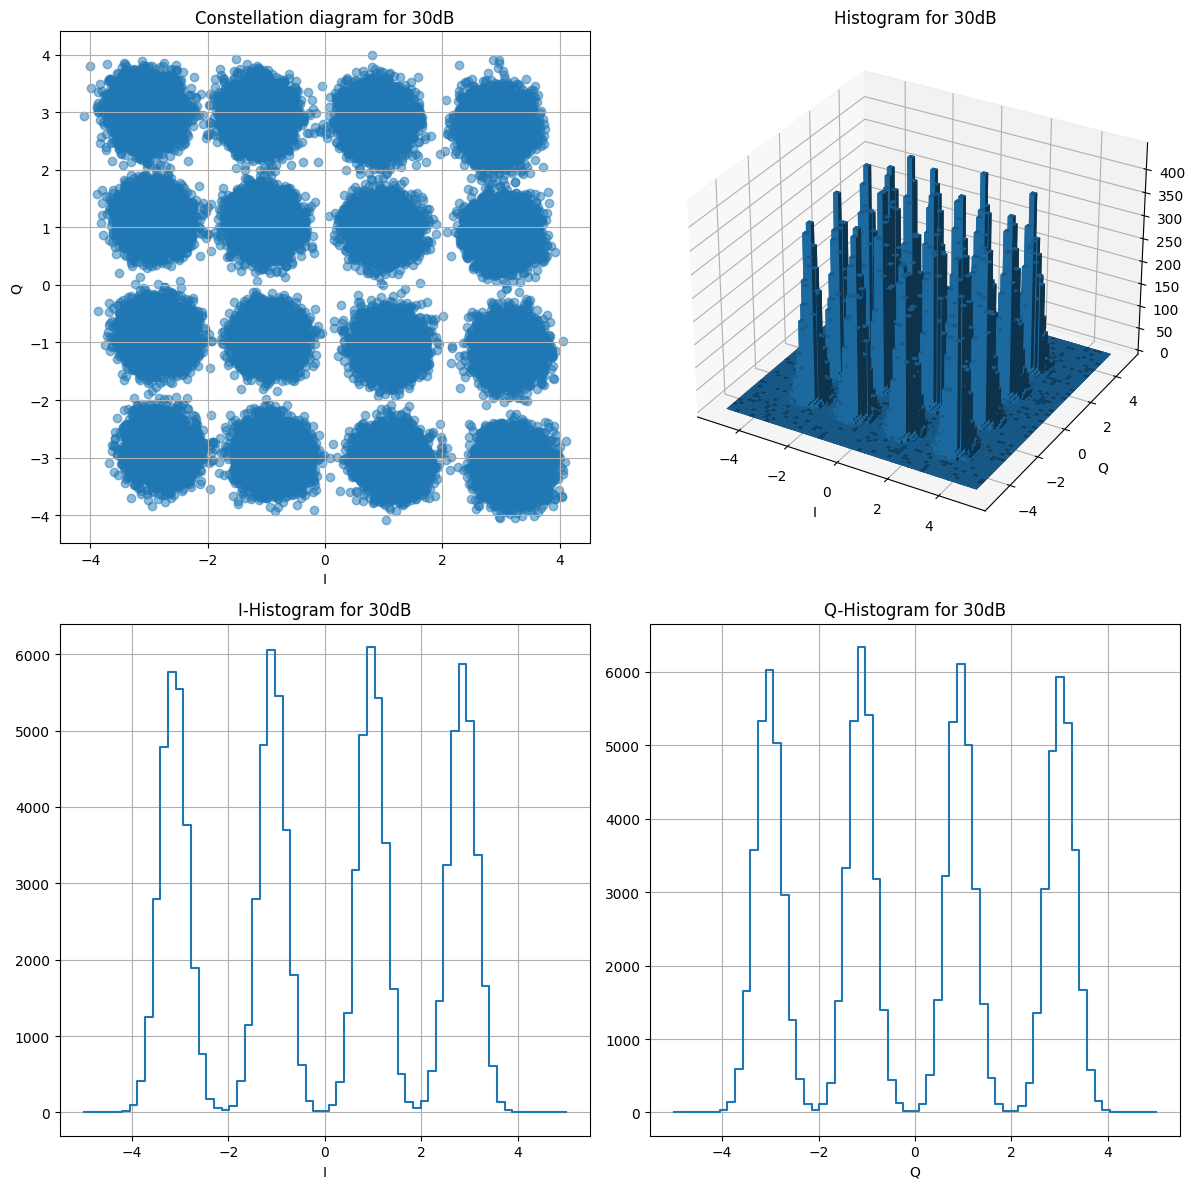

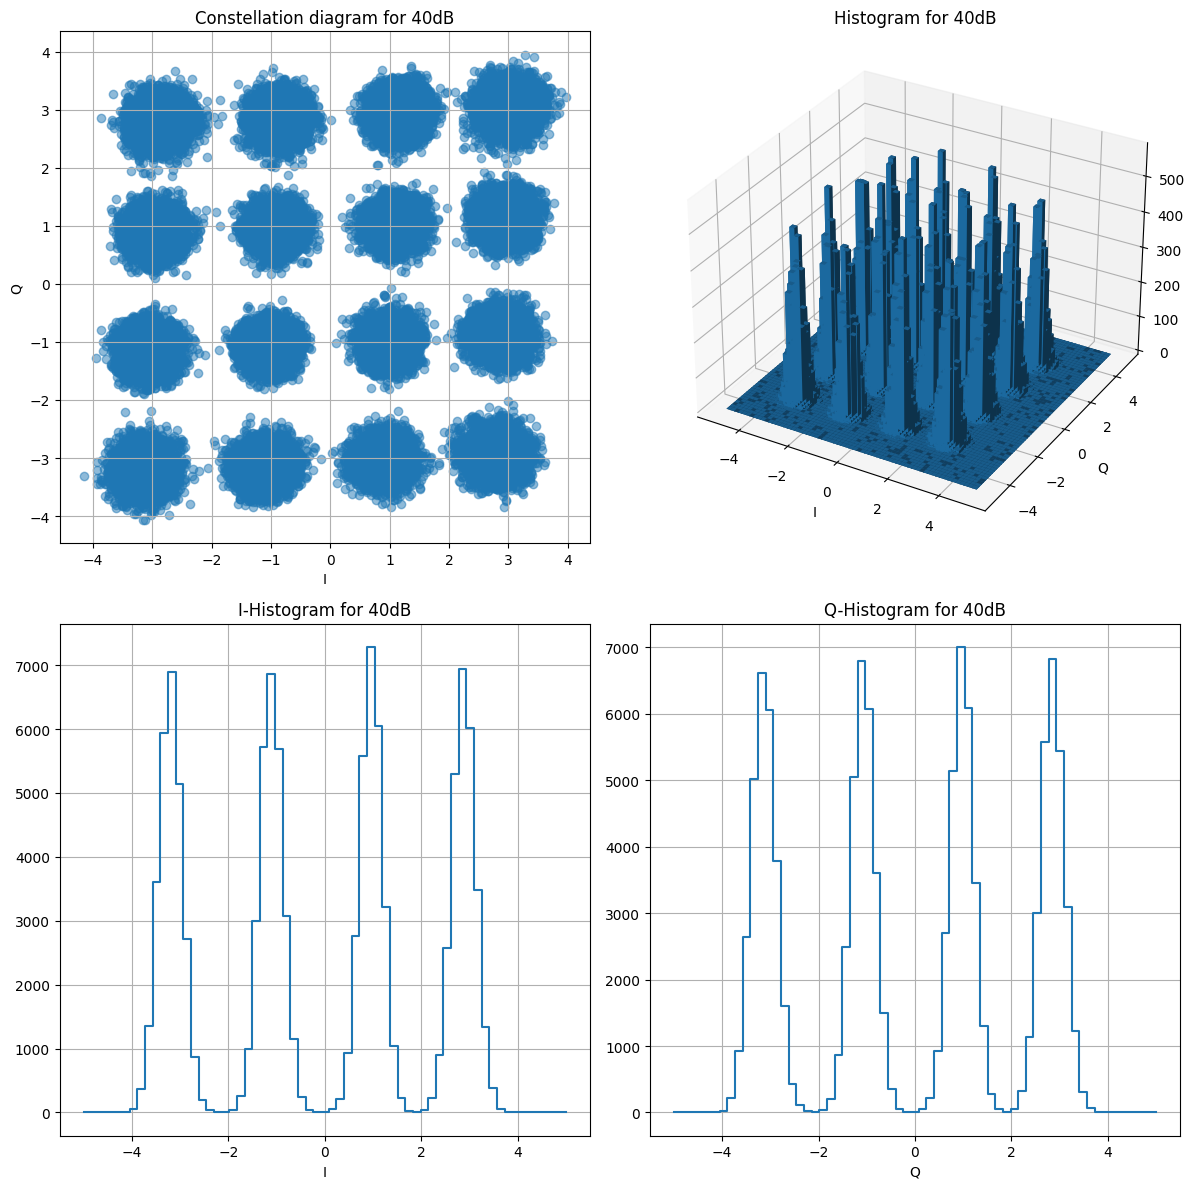

In [41]:
for i, snr in enumerate(X_rx):
    # Extraer información
    X_ch_norm = X_rx[snr].get("const_Y").flatten()
    X_ch = sofa.mod_norm(X_ch_norm, 10)*X_ch_norm
    
    # Graficar diagrama de constelación
    plt.figure(figsize=(12, 12), layout="tight")
    
    plt.subplot(2, 2, 1)
    plt.scatter(X_ch.real, X_ch.imag, alpha=0.5)
    plt.title(f"Constellation diagram for {snr[5:]}")
    plt.xlabel("I")
    plt.ylabel("Q")
    plt.grid(True)
    
    ax = plt.subplot(2, 2, 2, projection="3d")
        
    hist, xedges, yedges = np.histogram2d(X_ch.real, X_ch.imag, bins=64, range=[[-5, 5], [-5, 5]])

    # Construct arrays for the anchor positions of the 64 bars.
    xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    # Construct arrays with the dimensions for the 64 bars.
    dx = dy = 0.2 * np.ones_like(zpos)
    dz = hist.ravel()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
    plt.title(f"Histogram for {snr[5:]}")
    plt.xlabel("I")
    plt.ylabel("Q")

    # Plot I and Q histograms separately
    plt.subplot(2, 2, 3)
    plt.step(np.linspace(-5, 5, 64), hist.sum(axis=0))
    plt.title(f"I-Histogram for {snr[5:]}")
    plt.xlabel("I")
    plt.grid(True)
    
    plt.subplot(2, 2, 4)
    plt.step(np.linspace(-5, 5, 64), hist.sum(axis=1))
    plt.title(f"Q-Histogram for {snr[5:]}")
    plt.xlabel("Q")
    plt.grid(True)
    
    plt.show()